In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # For built-in PDF/PMF functions

In [8]:
sample2 = np.load('sample_2.npy')

print("Sample 2 size:", sample2.shape)
print("Sample 2 min:", sample2.min())
print("Sample 2 max:", sample2.max())
print("Sample 2 mean:", sample2.mean())
print("Sample 2 std:", sample2.std())
print("Unique values in Sample 2:", np.unique(sample2)[:20])


Sample 2 size: (1500,)
Sample 2 min: 1.364843652536024e-07
Sample 2 max: 0.008420469627919374
Sample 2 mean: 0.0009968344262284022
Sample 2 std: 0.000980020782769923
Unique values in Sample 2: [1.36484365e-07 6.16187045e-07 6.38567536e-07 1.04092206e-06
 1.22127853e-06 4.01983790e-06 4.56266326e-06 6.34600920e-06
 7.57643281e-06 7.73882042e-06 8.03576929e-06 8.52710059e-06
 8.69459314e-06 9.31503282e-06 9.46263503e-06 9.81410543e-06
 1.04431924e-05 1.24158424e-05 1.35613148e-05 1.40648538e-05]


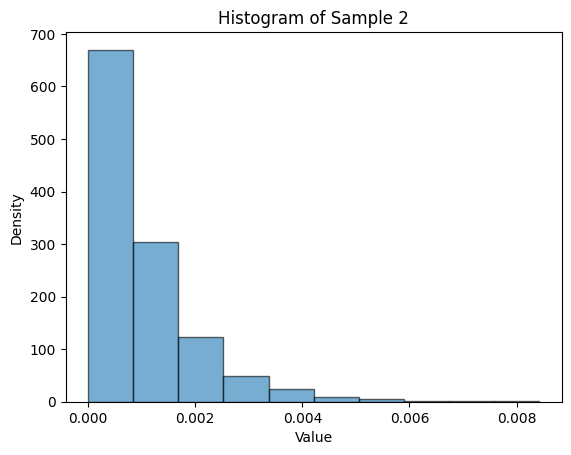

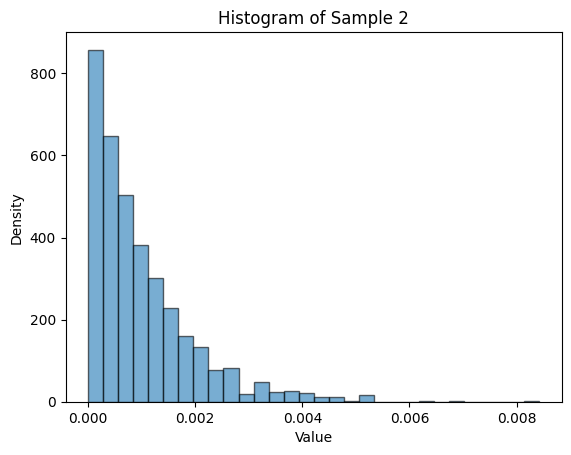

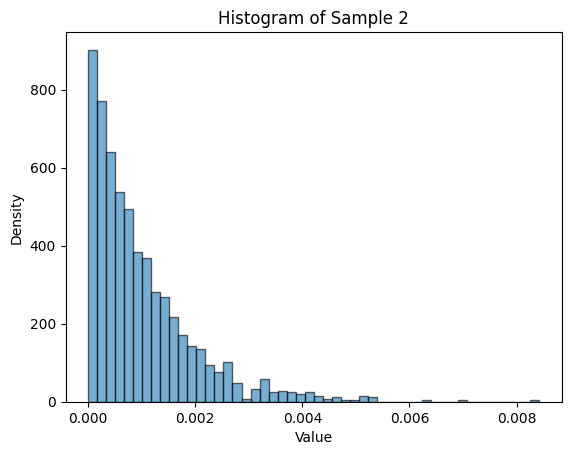

In [9]:
for b in [10, 30, 50]:
    plt.hist(sample2, bins=b, density=True, alpha=0.6, edgecolor='black')
    plt.title("Histogram of Sample 2")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

I opt for 30 'cause 10 and 30 are too "blocky" and demonstrates almost nothing (can be a linear with some noise to the end).
50 shows too many unimportant noisy spikes.

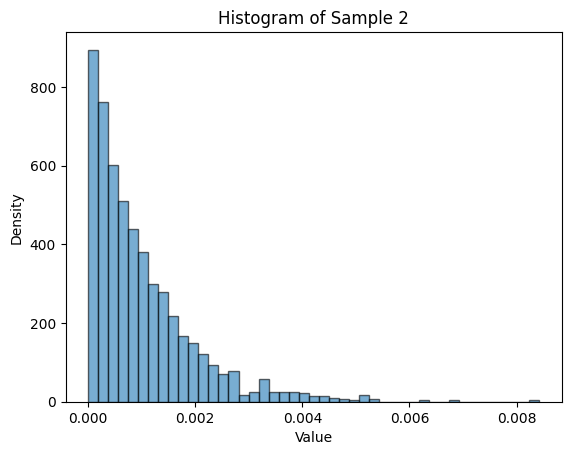

In [10]:
plt.hist(sample2, bins='auto', density=True, alpha=0.6, edgecolor='black')
plt.title("Histogram of Sample 2")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

bins='auto' somewhat agrees with me. I just think it shows too much noise.

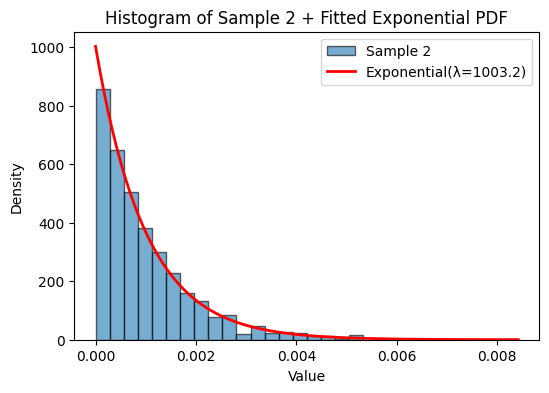

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(sample2, bins=30, density=True, alpha=0.6, edgecolor='black', label="Sample 2")


x_vals = np.linspace(0, sample2.max(), 200)

scale_est = sample2.mean()  # ~ 0.001 # mean == 1 / lambda for Exponential Distribution
rate_est = 1 / scale_est    # ~ 1000  # == lambda
pdf_vals = rate_est * np.exp(-rate_est * x_vals)


plt.plot(x_vals, pdf_vals, 'r-', linewidth=2, label=f"Exponential(λ={rate_est:.1f})")
plt.title("Histogram of Sample 2 + Fitted Exponential PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


* All values are:
  * non-negative
  * heavily right‐skewed,
  * with most points near zero,
  * with a "long tail" out to about 0.0084.
* The sample mean ≈ 0.001 is nearly equal to the sample standard deviation ≈ 0.001, which strongly suggests an Exponential distribution (where mean == std == scale). It is obvious that it is not a criteria but only a renowned property of an ED. 
* A good parameter estimate is scale ≈ 0.001 or equivalently λ ≈ 1 / scale ≈ 1000. Plotting the exponential PDF f(x) ≈ 1000 * exp⁡(−1000 * x) on top of the histogram shows a good visual fit.

Hence, Sample 2 is well-described by an Exponential distribution with parameter λ ≈ 1000.